### aim: 

### date: 

In [80]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')


In [81]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [82]:
import numpy as np
from cmocean import cm
import cartopy as cp
import cartopy.crs as ccrs
import netCDF4 as nc
import matplotlib.pyplot as plt
import xarray as xr
import sys
sys.path.append('/gpfs/home/mep22dku/scratch/SOZONE')
#list of models
sys.path.append('/gpfs/home/mep22dku/scratch/SOZONE/UTILS')
import lom
import utils as ut

%matplotlib inline
import warnings
from datetime import datetime
warnings.filterwarnings('ignore')
import cartopy.feature as cfeature
from importlib import reload
import matplotlib.path as mpath
import glob
import pickle
import pandas as pd
import seawater
import time
plt.rcParams.update({'font.size': 12})
font = {'family' : 'normal',
'weight' : 'normal',
'size'   : 12}

plt.rc('font', **font)

In [106]:
w = xr.open_dataset('/gpfs/data/greenocean/software/runs/TOM12_TJ_1AA6/nemo_scen_1A_1m_2001_calcMLD.nc')

w2 = xr.open_dataset('/gpfs/data/greenocean/software/runs/TOM12_TJ_1AA6/ORCA2_1m_20010101_20011231_grid_T.nc')

In [107]:
print(np.nanmax(w.MLD_03.values))

3752.442138671875


In [104]:
mm_tom = xr.open_dataset('/gpfs/data/greenocean/software/resources/regrid/mesh_mask3_6.nc')

mm_tom

<xarray.Dataset>
Dimensions:       (t: 1, x: 182, y: 149, z: 31)
Dimensions without coordinates: t, x, y, z
Data variables:
    nav_lon       (y, x) float32 ...
    nav_lat       (y, x) float32 ...
    nav_lev       (z) float32 ...
    time_counter  (t) float64 ...
    tmask         (t, z, y, x) int8 ...
    umask         (t, z, y, x) int8 ...
    vmask         (t, z, y, x) int8 ...
    fmask         (t, z, y, x) int8 ...
    tmaskutil     (t, y, x) int8 ...
    umaskutil     (t, y, x) int8 ...
    vmaskutil     (t, y, x) int8 ...
    fmaskutil     (t, y, x) int8 ...
    glamt         (t, y, x) float32 ...
    glamu         (t, y, x) float32 ...
    glamv         (t, y, x) float32 ...
    glamf         (t, y, x) float32 ...
    gphit         (t, y, x) float32 ...
    gphiu         (t, y, x) float32 ...
    gphiv         (t, y, x) float32 ...
    gphif         (t, y, x) float32 ...
    e1t           (t, y, x) float64 ...
    e1u           (t, y, x) float64 ...
    e1v           (t, y, x) float64 ...
    e1f           (t, y, x) float64 ...
    e2t           (t, y, x) float64 ...
    e2u           (t, y, x) float64 ...
    e2v           (t, y, x) float64 ...
    e2f           (t, y, x) float64 ...
    ff            (t, y, x) float64 ...
    mbathy        (t, y, x) int16 ...
    misf          (t, y, x) int16 ...
    isfdraft      (t, y, x) float32 ...
    e3t_0         (t, z, y, x) float64 ...
    e3u_0         (t, z, y, x) float64 ...
    e3v_0         (t, z, y, x) float64 ...
    e3w_0         (t, z, y, x) float64 ...
    gdept_0       (t, z, y, x) float32 ...
    gdepu         (t, z, y, x) float32 ...
    gdepv         (t, z, y, x) float32 ...
    gdepw_0       (t, z, y, x) float32 ...
    gdept_1d      (t, z) float64 ...
    gdepw_1d      (t, z) float64 ...
    e3t_1d        (t, z) float64 ...
    e3w_1d        (t, z) float64 ...
Attributes:
    file_name:  mesh_mask.nc
    TimeStamp:  28/02/2019 15:51:26 +0000

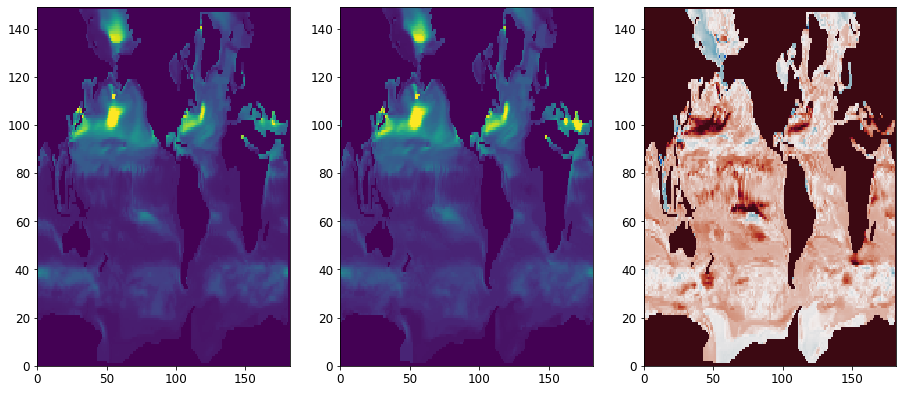

In [105]:
fact = 1.1
fig, axs = plt.subplots(1,3, figsize=(14*fact, 6*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()

axs[0].pcolormesh(w.MLD_03[0,:,:], vmin = 0, vmax = 200)
axs[1].pcolormesh(w2.somxl030[0,:,:], vmin = 0, vmax = 200)
axs[2].pcolormesh(w2.somxl030[0,:,:]-w.MLD_03[0,:,:], vmin = -20, vmax = 20, cmap = cm.balance)

In [92]:
w

<xarray.Dataset>
Dimensions:       (time_counter: 12, x: 182, y: 149)
Coordinates:
  * time_counter  (time_counter) datetime64[ns] 2001-01-01 ... 2001-12-01
    nav_lat       (y, x) float32 ...
    nav_lon       (y, x) float32 ...
Dimensions without coordinates: x, y
Data variables:
    MLD_01        (time_counter, y, x) float64 ...
    MLD_03        (time_counter, y, x) float64 -9.999e+03 ... -9.999e+03
Attributes:
    made in:  /SOZONE/windAnalyis/oceanFields/observational_MLD.ipynb
    desc:     backcalculate okesm mld

In [89]:

kurva = w.MLD_03.values

In [90]:
kurva = w.MLD_03.values
q = (np.where(kurva>5000))
print(np.shape(q))

v = 0
print(q[0][v])
print(q[1][v])
print(q[2][v])

print(kurva[0,36,107])
print('*')
print(mm_tom.mbathy[0,36,107].values)

v = 100
print(q[0][v])
print(q[1][v])
print(q[2][v])
print(kurva[0,108,110])

(3, 0)


IndexError: index 0 is out of bounds for axis 0 with size 0

In [91]:
print(w2.votemper[0,:,25,8].values)

[ 2.6325455   2.633271    1.3229059   0.03415041  0.05987168  0.5573922
  1.0131665   1.3093485   1.4750675   1.5729841   1.6383349   1.6832033
  1.712963    1.7302955   1.7354509   1.7263412   1.7005349   1.6600622
  1.6072391   1.5517668   1.5002187   1.4573205   1.4249768   1.3916321
  1.3519977   1.2992505   1.2475867   1.1910801   0.          0.
 -0.76984197]


In [ ]:
plt.pcolormesh(kurva[0,:,:])
plt.plot(36,107,'r.')

In [ ]:
import gsw
ct = (w2.votemper[0,:,108,110].values)
sa = (w2.vosaline[0,:,108,110].values)
print(w2.somxl030[0,108,110].values)
deptht = w2.deptht
st = gsw.sigma0(sa,ct)
print(st)


# def get_mld(sa,ct,deptht):

dens_10m = np.interp(10, deptht[7:9], st[7:9])
dens01 = dens_10m+0.01
dens03 = dens_10m+0.03


def get_mld(sa,ct,deptht):

    st = gsw.sigma0(sa,ct)
    dens_10m = np.interp(10, deptht[0:2], st[0:2]) #get density at 10m
    dens01 = dens_10m+0.01 #get criterions
    dens03 = dens_10m+0.03

    depth_dens01 = -9999 #default values
    depth_dens03 = -9999
    
    ## where are there 0s - run out of ocean values
    q = (np.where(ct == 0))
    first0 = (q[0][0])
    
    try:

        fb_01 = [np.where(st >= dens01)][0][0]
        fb_01 = fb_01[0]
        depth_dens01 = np.interp(dens01,st[fb_01-1:fb_01+1], deptht[fb_01-1:fb_01+1])
        #
        fb_03 = [np.where(st >= dens03)][0][0]
        fb_03 = fb_03[0]
        depth_dens03 = np.interp(dens03,st[fb_03-1:fb_03+1], deptht[fb_03-1:fb_03+1])
        
        #if it's finding 
        if fb_01 >= first0:
            depth_dens01 = deptht[first0-1]
        if fb_03 >= first0:
            depth_dens03 = deptht[first0-1]    

        
    except:
        
        pass

    return depth_dens01, depth_dens03

depth_dens01, depth_dens03 = get_mld(sa,ct,deptht)

print(depth_dens01)

In [ ]:
print(deptht)

In [ ]:
print(ct)

In [ ]:
def get_mld(sa,ct,deptht):

    st = gsw.sigma0(sa,ct)
    st = st.values
    dens_10m = np.interp(10, deptht[0:2], st[0:2]) #get density at 10m
    dens01 = dens_10m+0.01 #get criterions
    dens03 = dens_10m+0.03

    depth_dens01 = -9999 #default values
    depth_dens03 = -9999
    
    try:

        fb_01 = [np.where(st >= dens01)][0][0]
        fb_01 = fb_01[0]
        depth_dens01 = np.interp(dens01,st[fb_01-1:fb_01+1], deptht[fb_01-1:fb_01+1])
        #
        fb_03 = [np.where(st >= dens03)][0][0]
        fb_03 = fb_03[0]
        depth_dens03 = np.interp(dens03,st[fb_03-1:fb_03+1], deptht[fb_03-1:fb_03+1])
    
    except:
        
        pass

    return depth_dens01, depth_dens03
